adatb jegyzet a rendszerelmelet I-II fuzetben hatulrol
adatb szobeli vizsga osszes a rendszerelmelet II-ben!!!

# 2. Adatbázis-kezelők felépítése

- Nézet(view)
- Fogalmi adatbázis (logical db)
- Fizikai adatbázis (physical db)

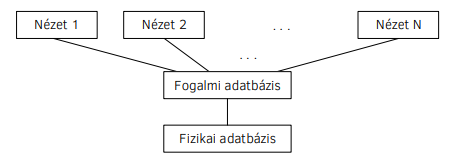

- Nézet(view):  az, amit és ahogy a felhasználó az adatbázisból lát. Pl. a légitársaság egységes nyilvántartásából más adatok érdekesek, ha a pilóták szabadságolási tervét készítjük, és az adatok másik körére van szükségünk, ha egy gép utaslistáját akarjuk megtekinteni
- Fogalmi adatbázis (logical db): való világ egy darabjának leképezése, az adatokat értelmezése. Pl. egy könyvtári adatbázisban ide tartoznak a következők: a kölcsönző személyek neve, kölcsönzőjegyének száma.
- Fizikai adatbázis (physical db): az adatbázis adatainak a fizikai tárolókon való elhelyezése. Ide értjük azokat az adatstruktúrákat is, amelyekben a (fizikai) adattárolás megvalósul. fogalmak: kötet, állomány, blokk, track, szektor, vödrös hashing

Adatfüggetlenség: rétegek egymástól függetlenül kicserélhetőek legyenek (interfacek alkalmazása). \
Fizikai adatfüggetlenség: (fizikai és fogalmi db között), a fizikai adathordozó kicserélése nem érinti meg a fogalmi db-t. \
Logikai adatfüggetlenség: (fogalmi db és a nézetek között), logikai db kicserélése nem jár a nézetek megváltozásával (nem feltétlenül teljesül)  

# 3. A fizikai adatbázis

DRDB - diszkrezidens db
IMDB : memóriarezidens db

Műveletek támogatása:
- beszúrás
- keresés
- módosítás
- törlés

Op rendszer db adatait állományokban tárolja, állományok blokkokból épülnek fel, a blokkok adatrekordokból épülnek fel.

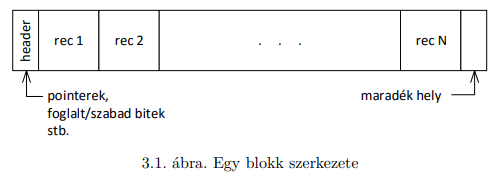

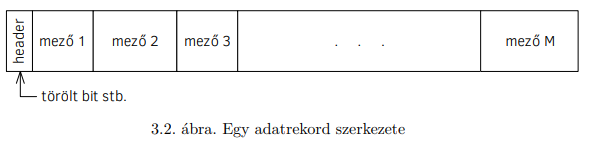

Kötött rekord: pointer mutat rá (foglalt) \
Szabad rekord: nem mutat rá pointer (szabadon mozgatható)

Rekord címzése: 
- abszolút cím a rekordra
- blokk cím + offset (blokkon belüli kezdő cím)
- kulcs a rekordra

Jelölések
- b - blokkméret
- $s_r$ - r állomány rekordmérete
- $n_r$ - r állomány rekordjainak száma
- $f_r$ - blocking factor - ( r állományban egy blokkban elhelyezhető rekordok száma), avagy egy blokkban hány rekord fér el (alsó egész rész)
- $b_r$ - állomány által elfoglalt blokkok száma (felső egész)

$$ (blocking factor) f_r = \left \lfloor \frac{b}{s_r} \right \rfloor = \frac{\text{blokk méret}}{\text{rekord méret}}  $$

$$\text{elfoglalt blokkok száma} = b_r = \left \lceil \frac{n_r}{f_r} \right \rceil = \frac{\text{ennyi rekord van az állományban}}{\text{ennyi fér el egy blokkban}}$$

## Heap szervezés

Legegyszerűbb tárolás, heap: halom, kupac, az adatokat legalább annyi blokkban tároljuk amennyit a rekordok mérete és száma megkövetel. Nincs segédstruktúra.

Keresés: 
- lineáris
- rekord megtalálása átlagosan = $\frac{(\text{blokkok száma} + 1)}{2}$ blokk átnézése

Törlés: 
- megtaláljuk a kívánt blokkot, majd fejlácben törlés (delete flag) beállítása, majd visszaírás db-be

Beszúrás:
- rekordok egyediságét biztosító mezők egyediségére ügyelve
- először törölt blokkok helyén, majd az állomány végén

Módosítás:
- rekord megkeresése, felülírása, visszaírás db-be

## Hash állományok

- minden rekordhoz egyértelmű címet rendelün egy hash fgv segítségével
- hash fgv a rekord K kulcsát leképzi egy intervallumra (intervallum legalább akkora mint a rekordok száma)
- egy blokkművelettel elérhetjük a rekordot

Vödrös Hash: \
- adatállomány felosztása B részre : ekkor [0,B-1] az elemek intervalluma
- B számú mutatót tartalmaz a vödörkatalógus, a vödrök blokkcsoportokat tartalmaznak, ezek címe van a B számú mutatóban (pointerben)
- K kulcsú rekord mindig h(K)-adik vödörbe kerül
- hash fgv pl.: h(K) = (c*K)mod B, ahol c tetszőleges konstans

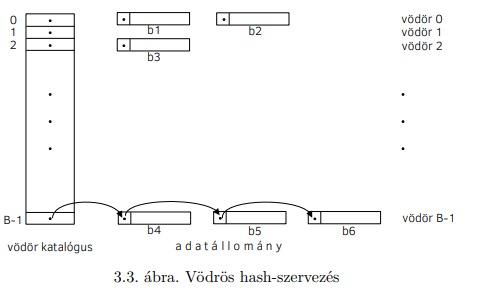

Keresés: 
- rekord kulcsa K, majd kiszámítjuk h(K)-t, kiolvassuk a vödör katalógus h(K)-adik bejegyzését, ezen a címen kezdődő vödörben van a keresett K kulcsú rekord
- vödrön belül lineáris keresés, off: túlcsordulási blokk: ha az adott vödörben nem találtuk akkor akövetkezőben keresünk, ha itt sincs akkor nincs benne
- rekord megtalálása átlagosan: $\frac{1}{2B}$ blokk átnézése

Beszúrás:
- K kulcsú rekord elhelyezése, h(K) kiszámítása, vödörkatalógus h(K)-ik eleme, ez egy vödörre mutat, megnézzük hogy szerepel-e benne K kulcsú rekord, ha nem K kulcsú rekord beszúrása

Törlés:
- megkeressük a rekordot és törölt flaget beállítjuk

Módosítás:
- ha nem érint kulcsmezőt: rekordot tartalmazó blokk megkeresése, rekord módosítása, blokk visszaírása
- ha érint kulcsmezőt, akkor törlés és beszúrás

## Indexelt állományok

nem a könyvtárt sétáljuk végig hogy megtaláljunk egy könyvet csak pl a könyvtári katalógus: könyvek címe (vagy könyvek szerzője vagy témája) -> könyvek helye \
indexelt szervezés: keresés kulcsa egy indexált állományban, és ehhez a kulcshoz egy mutatót (pointer) rendelünk, ami megadja a tárolt adat helyét \
indexállomány mindig rendezve: numerikus: obviously sorrendben; szöveges: lexikografikusan

kulcs + mutató rögzített (egységes) hosszúak. méret: k + p \
az indexállomány blocking factor: $ f_i = \left \lfloor \frac{b}{k+p} \right \rfloor  = \frac{\text{blokk méret}}{\text{kulcs + pointer méret}}$

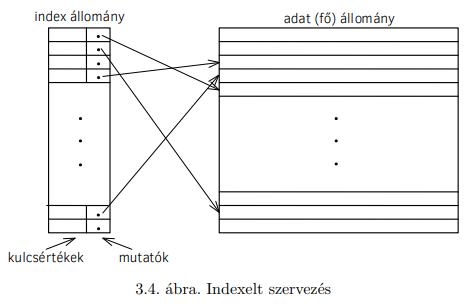

Ritka index: indexrekordot rendelünk adatrekordok egy csoportjához, pl egy blokkban levőkhöz \
Sűrű index: indexrekordot rendelünk minden egyes adatrekordhoz 

### Ritka indexek

szótár lapok felső sarkában írott index, azonosítja hogy a keresett címszó a szótár melyik oldalán található \
ritka indexelés: az adatállomány rekordjai melyik blokkban találhatók\
adatállományt is rendezetten kell tárolni ritka indexek esetében\
az adott blokkra mutató indexrekord a blokk címét és a legkisebb (v legnagyobb) kulcsot határozza meg

a ritka indexállomány által elfoglalt blokkok száma: 
$$b_{ri} = \left \lceil \frac{n_{ri}}{f_{ri}} \right \rceil $$
,ahol
- $b_{ri}$ a ritka index blokkszáma (amúgy $b_i$ elnevezés is ua.)
- $n_{ri} = b_r$, vagyis az adatállomány által elfoglalt blokkok száma (ennyi index (k + p pár) kell)
- $f_{ri}$ a ritka index blocking faktor, ua. index blocking faktor $f_i$

Keresés: 
- k1 kulcsú rekordot keressük, ehhez megkeressük azt a legnagyobb k2 kulcsot amire $k2 \leq$ k1, k2 kulcsú indexrekord mutatója megcímzi a keresett blokkot, amiben megkeressük k1-t
- pl alul: EFTA-t keressük, kulcs lexikografikusan CERN és ILS között, CERN $\leq$ EFTA, CERN pointer-> blokk3, blokk3-ban megkeressük EFTA-t

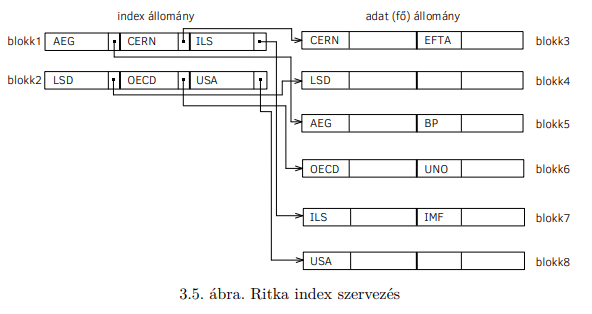

Beszúrás:
- k1 kulcs, megkeressük melyik blokkban lenne a helye, tfh $B_i$ blokkban
- ha  van hely $B_i$-ben, beleírjuk
- ha nincs új blokk kérése $B_n$. $B_i$-ben lévő rekordok k1 kulcsúval együtt megfelezzük $B_i$ és $B_n$ között (kettéosztjuk). B két blokkban a legkisebb kulcsok meghatározása, $B_i$-hez tartozó INDEXBEN kulcskorrekció ha kell, majd új indexrekord $B_n$-hez

Törlés:
- k1 kulcsú rekord törlése:
- ha a blokkban nem a legkisebb akkor simán töröljük
- ha a legkisebb, akkor törlést követően korrekció az indexállományban, a következő új legkisebb kulcs a blokkhoz

Módosítás:
- ha nem érint kulcsot, sima módosítás
- ha érint kulcsot: törlés ésbeszúrás

### B*-fák, mint többszintes ritka indexek

indexállományhoz is indexállományt rendelünk, mindaddig amíg az utolsó index a legfelső szinten csak egy blokkban van \
blokkelérés átlagos idő (bináris fa esetén): 
$log_2 b_i$\
ahol $b_i$ az i indexállomány blokkjainak száma \
csökenthető a keresési idő, blokkelérések csökkentése $log_k b_i$ -vel arányos keresési "idő" (blokkelérés) - ha k ágú fákben tároljuk az indexeket

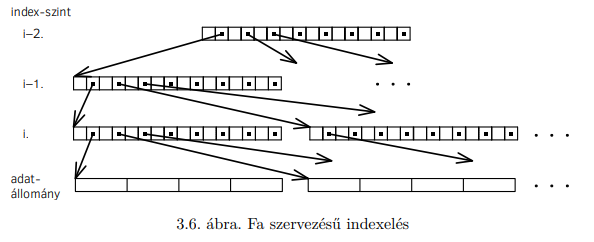

B*-fa eseténe a blocking factor:
$$f_i = \left \lfloor \frac{b + k}{k + p} \right \rfloor = \frac{\text{blokk + kulcs méret}}{\text{kulcs + pointer méret}} $$

B*-fa szintjeinek száma:
$$HT_i = \left \lceil log_{f_i} b_r \right \rceil$$

Keresés: 
- tfh. v1 kulcsú rekordot keressük, indexállomány tetején lévő blokkban megkeressük azt a v2 kulcsot ami a legnagyobb azok közül amik kisebbek v1-nél v2 $\leq$ v1, ennek a mutatójával egy az indexfa következő szintén lévő indexeket tartalmazó blokkra ugrunk, ahol megkeressük v3 kulcsú rekordot, ami a legnagyobb a v1-nél kisebb kulcsú rekordok közül...iterálva eljutunk a v1-t tartalmazó adatállomány blokkra, ahol kikeressül v1-t

Beszúrás
- pl alul: (megj.: adatrekordokban most csak egy mező.). 
[k1 = 32]-es rekord beszúrása. legfelső szinten 25 $\leq$ 32, alatta 32 < 64, -> B7 blokk, itt hozzáadás után egyúttal ketté is bontjuk a blokkot. (B7 és B12), új kulcs B12 blokkban 36, 64 kulcs felkerül a gyökérbe, kiegyenlítjük a fát

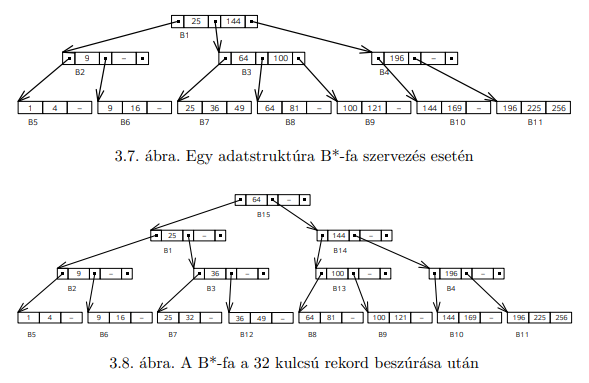

Törlés:
- megkeresés és törlés, blokkösszevonás, ha utolsó rekord is kitörlődött a blokkból a blokkhoztartozó kulcs törlése az indexállomány részfájából

Módosítás:
- ló túloldala

### Sűrű indexek

Minden adatrekordhoz tartozik indexrekord \
nem állományszervezési módszer! mindig ráépül egy ritka index vagy hash \
megkönnyítik pl a főállomány elérését, vagy a több kulcs szerinti keresést \
az adatállományt nem kell rendezetten tárolni \
adatrekordok elérése a sűrűindexeken keresztül

Sűrűindex blokkok száma: 
$$b_{si} = \left \lceil \frac{n_{si}}{f_{si}} \right \rceil$$
ahol:
- $n_{si} = n_r$ az állományban lévő rekordok száma 

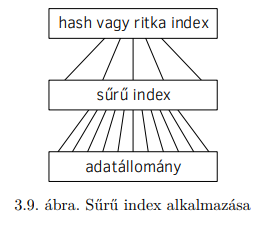

Keresés: 
- indexállományban megkeressük a kulcsot, a sűrűindexen keresztül elérjük a rekordot

Beszúrás:
- üres hely a tárolandó rekordnak, (törölt helyen vagy az állomány végén), beszúrjuk és berakjuk az indexállományba a kulcsot

Törlés: 
- rekord megkeresése, majd flag állítás, kulcs kivétele az indexállományból

Módosítás:
- megkeressük átírjuk és visszaírjuk a háttértárra. ha kulcs is érintett az indexállományt újrarendezzük

### Invertálás

pl személyeknél kulcs a szig szám, de mi névre akarunk keresni, vagy településre hogy hol lakik, cél több mező szerint támogatni az adatrekordok elérését.\
egyik lehetőség több indexállomány létrehozása keresési kulcsonként 

Definíció – invertált állomány (inverted file). Azt az indexállományt, amely
nem kulcsmezőre tartalmaz indexeket, invertált állománynak nevezzük.

invertált állomány mutatói: 
1. (fizikai)
- a) adatállomány megfelelő blokkjára 
    - adtállomány rekordjai kötöttek és csak egy invertált állomány használható
- b) adatállomány elsődleges kulcsa szerinti sűrű indexállomány megfelelő rekordjára 
    - egyel több indirekció, de adatMEZŐ változtatáskor, csak a mezőt tartalmazó invertállományt és indexállományt kell módosítani pluszban (3.10) sűrűindexek segítségével tetszőleges számú ritka index az adatállomány felett
2. (logikai)
- adatállomány vmelyik kulcsértékét tartalmazzák az invertált állományok
    - szabad adatállomány rekordok (3.11)


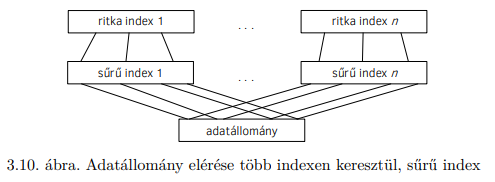

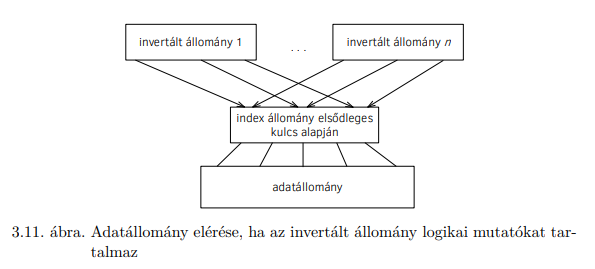

## Váltoró hosszúságú rekordok kezelése

változó hosszúságú mező: mezőlista végén helyezzük el vagy pointer mutat rá máshova.
ismétlődő mező: adott lefoglalt hely, amit folyamatosan bővítünk

## Részleges információ alapján történő keresés

particionált hash függvények : h(mező1, mező2...) = h(m1)* h(m2)* ...h(mk), h(mi) i-ik mező hash fgv-e.\
*: konvolúció. \
h(mi)-k xi-reképeznek,  sum(xi) = N, N a rekord címe

# 4. A fogalmi (logikai) adatbázis

## Adatmodellek, modellezés

Egy adatmodell (data model) két részből áll:
1. formalizált jelölésrendszer adatok, adatkapcsolatok leírására
2. műveletek az adatokon

Ábrázolás alapegysége a rekord, adatbázis struktúráját a rekordtípusok közötti kapcsolatok határozzák meg. \
különböző adatmodellek: hálós, relációs, objektumorientált

## Az egyed-kapcsolat modell (entity-relationship, ER)

nem adatmodell, mert nincsenek benne adatműveletek definiálva

### ER-modell elemei

- egyedtípusok
- attribútumtípusok
- kapcsolattípusok

#### Entitások

Definíció – egyed, entitás (entity). A valós világban létező, logikai vagy fizikai
szempontból saját léttel rendelkező dolog, amelyről adatokat tárolunk.

- adott tulajdonságok mentén megkülönböztethető, pl autó, személy igen, de hangya, tojás nem

Definíció – tulajdonság (property). Az entitásokat jellemzi, amelyen vagy amelyeken keresztül az entitások megkülönböztethetők.

Definíció – egyedhalmaz (entity set). Az azonos attribútumtípusokkal jellemzett egyedek összessége.


példa: 
- EMBER(név, szül_dátum, anyja_neve, szeme_színe, személyi_szám)
- SZERZŐDÉS(cég1, cég2, dátum, hely, szerződés_tárgya, érték, telj_határidő)


#### Kapcsolatok

az egyedek vmilyen kapcsolatban állnak egymással; az entitások közötti kapcsolattípusok (entitás típus névvel ellátott sorozata?) definiálása

Definíció – kapcsolat (relationship). Entitások névvel ellátott viszonya.

Dolgozik: Ember, Cég -> ember adott cégnél dolgozik \
Aláír: Ember, Cég, Szerződés -> ternáris kapcsolat, egy személy egy cég nevében aláír \
Testvére: Ember, Ember

Kapcsolatok funkcionalitása (kardinalitás): egy-egy, egy-több,több-több kapcsolat

Definíció – egy-egy kapcsolat (one-to-one relationship). Olyan (bináris) kapcsolat, amelyben a résztvevő entitáshalmazok példányaival egy másik entitáshalmaznak legfeljebb egy példánya lehet kapcsolatban.


pl: 
- Házas: Ember, Ember
- Főnök: Osztály, Ember

Definíció – több-egy kapcsolat (many-to-one relationship). Egy K: E1, E2 kapcsolat több-egy, ha E1 példányaihoz legfeljebb egy E2-beli példány tartozhat, viszont E2 példányai tetszőleges számú E1-beli példányhoz tartoznak.

pl.: Tanul: Diák, Osztály

Definíció – több-több kapcsolat (many-to-many relationship). Egy K: E1, E2 kapcsolat több-több, ha E1 példányaihoz is tetszőleges számú E2-beli példány tartozhat, és E2 példányaihoz is tetszőleges számú E1-beli példány tartozhat.

pl.: Tan :Diák, Tantárgy - egy diáknak több tantárgya lehet, egy tantárgyat több diék tanulhat 

### Kulcs

Definíció – kulcs (key). Az ER-modellezésnél az attribútumoknak azt a halmazát, amely az entitás példányait egyértelműen azonosítja, kulcsnak nevezzük

pl Ember entitást azonosítja a (szig. szám) attribútum, vagy a (név, születési dátum, anyja neve) attribútumhalmaz

### ER-modell grafikus ábrázolása: ER-diagram

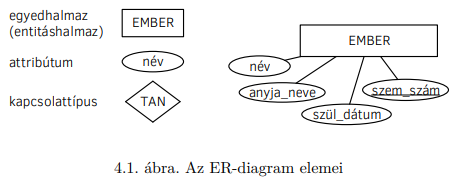

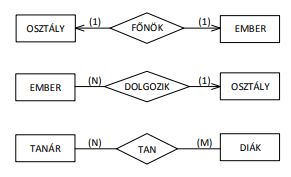

ISA kapcsolat, "is a"- szülő-gyerek viszonyt fejez ki

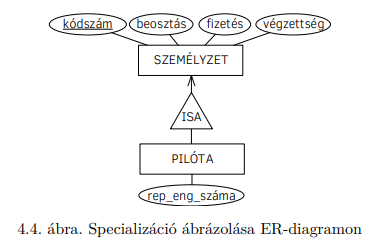

Gyenge egyedhalmaz: identitását egy (vagy több) tulajdonos egyedhalmaz biztosítja, amely a gyenge egyedhalmazzal több-egy viszoyban áll, neve: determináló kapcsolat. \
pl.: kurzus gyenge egyedhalmaz, mert adott félévben adott oktató nem határozza meg, kell hozzá egy tárgy legalább. Az indul a determináló kapcsolat, a kurzus péládnyok egyedisége a tárgy példányaival együtt biztosítható

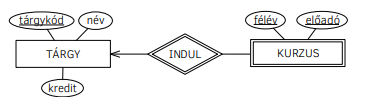

# 5. A relációs adatmodell

## Az adatok strukturálása

Definíció – reláció (relation). Halmazok Descartes-szorzatának részhalmaza.

adott n (valódi, azonos elemeket nem tartalmazó) halmaz, benne lévő értékek egy tartományból (domain) vannak. domainek rendre $D_1, D_2, ... ,D_n$. pl ($D_1 = {1,2,3}$). $D_1 \times D_2 \times ... \times D_n$ Descartes-szorzat n-eseket tartalmaz ($v_1, v_2, ..., v_n$) melyek elemei az D elemeinek permutációja. 

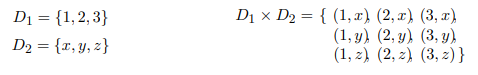

pl.: $D_1, D_2$ két domain, elemei $v_i$-k, Domainek descartes szorzatában a domainek elemei permutálódnak, így kapjuk pl az (1,x) n-est (vagy tuple-t), ahol $v_1 = 1 \in D_1$ és $v_2 = x \in D_2$ 

Reláció pl.: $r_1 = {(1,x),(1,z),(3,z)}$ vagy $r_1 = {(2,x),(3,y)}$, tehát az n-esek halmazainak tetszőleges uniója

Táblázatos formában: 
- oszlopok (attribútumok) a domainek
    - attrikútumok kardinalitása: attribútumok különböző értékeinek száma
- sorok: reláció elemei, n-esek konkrét előfordulásai

Relációs séma: $R(A_1, A_2, ..., A_k) $, ahol R a relációs séma neve, $A_i$-k az attribútumai
- pl.: Személy(Név,Kor,Foglalkozás)

r reláció sémája R, jelölése: r(R)

- reláció: maga a konkrét tábla, aminek már vannak elemei
- reláció séma: header sor, attribútumhalmaz névvel ellátva
- n-es: konkrét sor előfordulás a táblában

- reláció foka (aritás): relációban lévő oszlopok (attribútumok) száma
- reláció számossága: a relációban lévő sorok száma

tulajdonságok:
- a reláció nem tartalmazhat két azonos sort
- n-esek (sorok) sorrendje nem számít
- oszlopoknak egyértelmű nevük van

## Műveletek relációkon

### Egyesítés, unió

feltétel: $r_1, r_2$ ugyanannyi attribútum

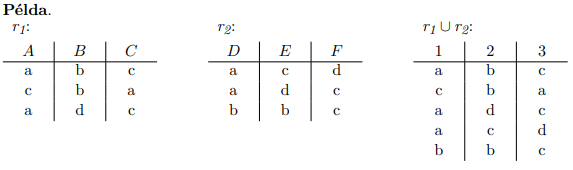

off: a|d|c tuple nem lehet benne kétszer

### Különbségképzés

feltétel: $r_1, r_2$ ugyanannyi attribútum

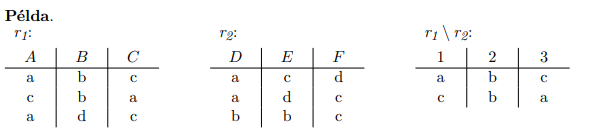

off: csak a|d|c közös, ezt kivesszük $r_1$-ből

Metszetképzés: -> két különbséggel kifejezhető
$$A \cap B = A \setminus (A \setminus B)$$

### Descartes-szorzat (Cartesian product, cross product)

$r_1 \times r_2$ Descartes-szorzat eredménye az összes ($n_1 + n_2$)-esekből áll [..,]. Tehát minden $r_1$-beli sorhoz hozzárendeljük az $r_2$-beli sorokat

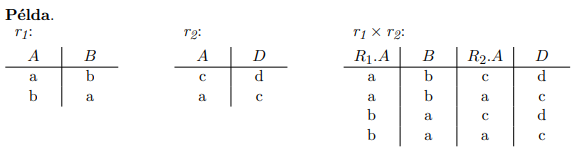

### Vetítés, projekció

A reláció egyes attribútumait megtartjuk (a többi dont care) \
Jelölése:
$$\pi_{\text{Attribútum(ok)}} (\text{reláció})$$
pl.: adott relációs séma:  Gépkocsi(Ár, Rendszám, Évjárat,...) és a rá illeszkedő "gépkocsi" reláció. Adott $\pi_{\text{Ár, Évjárat}} (\text{gépkocsi})$ vetítés a gépkocsi reláció n-esiból csak az Ár, Évjárat attribútumoknak megfelelő párokat tartja meg. \
Tehát csak az adott (vetített, keresett) oszlopok maradnak a relációban.


### Kiválasztás, szelekció

Az r reláció minden elemére kiértékelünk egy formulát (szelekciós feltétel) és csak azt vesszük be az eredménybe ami teljesíti a szelekciós feltételt.\
jelölése:
$$ \sigma_ {F} (r) $$
ahol F a szelekciós feltétel, F tartalmazhat: 
- konstansokat, R attribútumokat, 
- aritmetikai összehasonlító operátorokat ($< = > \leq \geq$), 
- logikai operátorokat ($\land \lor \neg$)

pl.: $\sigma_{KOR<23 \land NÉV = 'Kovács'} (\text{névsor})$ \
kiválasztja azokat a rekordokat a névsor relációból, amelyek kor attribútuma kisebb, mint 23 és név attribútuma Kovács

### Természetes illesztés (r $\bowtie$ s)

két reláció, bennük legalább egy megegyező nevű attribútum, azon elemeket illesztjük össze ahol adott közös attribútum értékei megegyeznek \
jelölése:
$$r \bowtie s = \pi_{R \cup S} \sigma_{(R.X_1 = S.X_1)\land ...\land (R.X_n = S.X_n)} (r \times s)$$
$R \cup S$ azért, hogy az azonos nevű attribútumok csak egyszer szerepeljenek

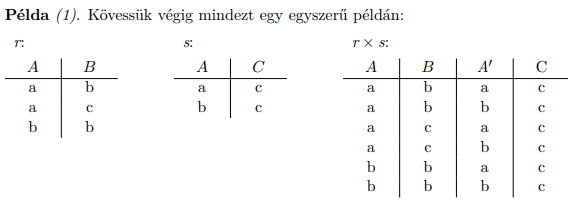
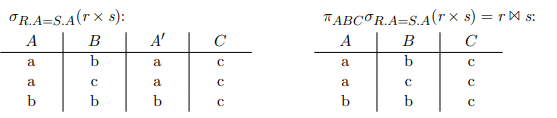

- adott r és s reláció, képezzük a descartes szorzatukat, majd kiválasztjuk azokat a sorokat ahol R.A = S.A-val, végül projektáljuk hogy csak az A,B,C attribútumok legyenek az eredményben 

### $\theta$-illesztés (theta-join) (r $\underset{\theta}{\bowtie}$ s)

adott r és s reláció, plusz $\theta$ kvantormentes feltétel, melyet r és s reláció egy-egy feltétele között definiálunk. képezzül r és s Descartes szorzatát, majd a $\theta$ feltétel szerint szűrünk. \
jelölése:
$$r \underset{\theta}{\bowtie}s$$

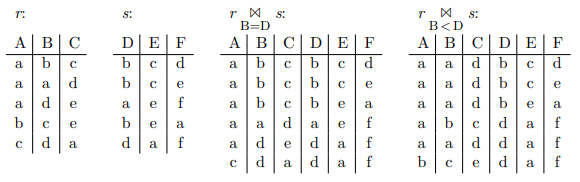

1. eredménytábla: azok a párok, ahol B attr. = D attr. maradnak meg,
2. eredménytábla: azok a párok ahol a B attr. elemei lexikografikusan D attr.-tól kisebbek (a reláció szerinti sorban, step1: b,c,d -> a,a,d, step2: b,c,e -> a,a,d, step3: a,e,f -> $\empty$, step4: b,e,a -> a,a,d, step5.1: d,a,f -> a,b,c, step5.2: d,a,f -> a,a,d step5.3: d,a,f -> b,c,e)

### Hányados (division: $\div$)

r $\div$ s az a reláció, melyre igaz, hogy s-sel alkotott Descartes-szorzata a lehető legbővebb részhalmaza r-nek. \
Tehát: $(r \div s) \times s \subseteq r$

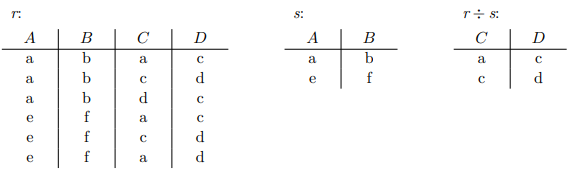

a legbővebb részhalmaz  $ (r \div s )\times$ s :\
a|b|a|c \
a|b|c|d \
e|f|a|c \
e|f|c|d

## Relációs lekérdező nyelvek

- ralációs algebra
- relációs sorkalkulus
- relációs oszlopkalkulus

### Relációs sorkalkulus

Felépítése: a nyelv szimbólumaiból atomokat (alapformulákat, prímformulákat) hozhatunk létre, amelyek formulákká építhetők össze, a formulák pedig egy kifejezésbe építve alkalmasak arra, hogy segítségükkel relációkat írjunk le

fontosabb szimbólumok (többi adatb 2019 könyv 57.o)
- sorváltozók: $s^{(n)}$ , n változós
    - egy sort ír le ami n oszlopból áll
- sorváltozók komponensei: $s^{(n)} [i]$ , ahol 1 ≤ i ≤ n
    - a soron belül kijelöli az adott n.-ik elemet, pl első..második..n. oszlop
- (konstans) relációk: R(m). , m változós
     - maga az r reláció, itt most R-rel jelöli, m pdig az attribútumok száma


- $R^{(m)}$ ($s^{(m)}$)
    - $R^{(m)}$ reláció $s^{(m)}$ sorváltozóval, a relációbal lévő sorok helytartója
- $s^{(n)}[i] \theta  u^{(k)}[j]$, ahol 1 ≤ i ≤ n, 1 ≤ j ≤ k és $\theta$ aritmetikai relációjel
    - adott két különböző relációból származó sorok, az egyik i oszlopában lévő elemet összehasonlítjuk a másik j oszlopában lévő elemmel a $\theta$ kifejezés segítségével, pl <=>
- $s^{(n)}[i] \theta  c$
    - az s sorok i oszlopában lévő értéket egy konstans értékkel hasonlítjuk össze
- R(n)(c1, c2, . . . , cn)

a lekérdezés általánosan: 
$ \{ s^{(m)} | \Psi (s^{(m)}) \}$ \
, ahol azok az s sorok (m számú eredményoszlop) kerül bele a lekérdezés eredményébe, melyek teljesítik a $\Psi$ feltételt az s sorokra fonatkozóan

Példa: 
- $\{ t^{(2)} | BEVÉTEL(t) \cap t[1] \geq '19970101'\}$
    - olyan két oszlopú t-re illeszkedő sorokat keresünk, ahol t sor a BEVÉTEL reláció eleme (sora) és t sor első attribútumának (oszlopa) értéke nagyobb mint 19970101
- $\{u^{(2)} | BEFIZ(u) \cap (\exists v)BEVÉTEL(v) \cap v[1] = '19970115' \cap v[2] = u[1]\}$
    - a sorváltozó amire illesztünk most a két oszlopú u, ahol igaz hogy u eleme a BEFIZ tábla elemeinek és létezik olyan v sor a BEVÉTEL táblában, hogy a v sor második oszlopának értéke megegyezik az u sor első oszlopának értékével

### Relációs oszlopkalkulus

oszlopváltozók
- ...
- $u_i$-k

atomok felépítése:
- $R^{(m)}(x_1, x_2,..., x_m)$, ahol $x_1, x_2,..., x_m$ konstansok vagy oszlopváltozók
- x $\theta$ y, ahol x és y konstansok vagy oszlopváltozók és $\theta$ aritmetikai relációjel.
- ...

kifejezés áltaánosan: 
$\{x_1, x_2, ..., x_m | \Psi (x_1, x_2, ..., x_m) \}$ \
,ahol $x_i$-k az oszlopváltozók

pl.:
- $\{ x,y | BEVÉTEL(x,y) \cap y \geq '19970101' \}$
    - olyan két x,y oszlopváltozóra illeszkedő sorokat keresünk, ahol x,y oszlopok a BEVÉTEL reláció attribútumai és y attribútum (oszlop) értéke nagyobb mint 19970101
- $\{ x,y | BEFIZ(x,y) \cap (\exists z)BEVÉTEL(z,x) \cap z = '19970115' \}$

## Az SQL nyelv

# 6. Relációs lekérdezések optimalizálása

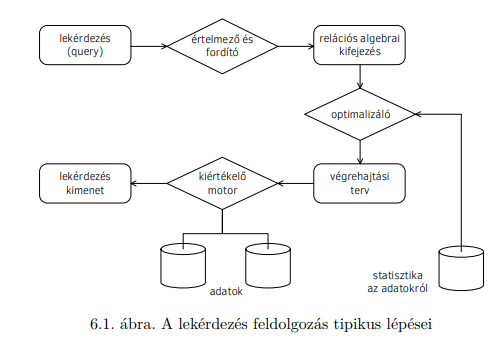

### 6.2.1 Katalógusban tárolt egyes relációkra vonatkozó információk

- $n_r$: az r relációban lévő rekordok (elemek) száma
- $b_r$: az r relációban lévő rekordokat tartalmazó blokkok száma
- $s_r$: az r reláció egy rekordjának nagysága bájtokban
- $f_r$: (blocking factor) ennyi rekord fér el az r reláció egy blokkjában
- $V(A,r)$: hány különböző értéke van az A attribútumnak az r relációban. (az A attribútumú oszlopban lévő egyedi értékek száma). $V(A,r) = |\pi_A(r)|$. Speciálisan, ha az A kulcs (minden elem egyedi), akkor $V(A,r) = n_r$
- $SC(A.r)$: azon rekordok várható száma, melyek kielégítenek egy egyenlőségi feltételt az a attribútumra, feltéve hogy legalább egy rekord kielégíti. (Selection Cardinality)
    - Ha A egyediséget biztosít (csupa unique value) akkor $SC(A,r) = 1$
    - Ha nem, akkor feltesszük, hogy a V(A,r) -nyi egyenlőséget biztosító rekord egyenlően oszlik el,ekkor $SC(A,r) = \frac{n_r}{V(A,r)}$

### 6.2.2 Katalógus információk indexekről

indexek (segédstruktúrák) jellemzése:
- $f_i$: az átlagos pointer szám a fa struktúrájú indexek csomopontjaiban (, mint pl a B*-fáknál), azaz a csomópontokból induló ágak átlagos száma. (elágatzási tényező, binom-fa: 2)
- $HT_i$: az i index szintjeinek a száma, az index magassága (height of tree). Az r relácit tartalmazó heap-szervezésű állományra épített B*-fa esetén $HT_i = \left \lceil log_{f_i}b_r \right \rceil$, egy Hash-állománynál $HT_i = 1$
- $LB_i$: az i index legalsó szintű blokkjainak a száma, azaz a levélszintű indexblokkok száma

## 6.3 Műveletek költsége

$E_{alg}$ : az algoritmus becsült költsége

### 6.3.1 Szelekció

#### Alap szelekciós algoritmusok

- A1: Lineáris keresés: $E_{A1} = b_r$ 
    - Minden rekordot végignézünk, hogy kielégíti-e a szelekciós feltételt
- A2: Bináris keresés: $E_{A2} = \left \lceil log_2 b_r \right \rceil + \left \lceil \frac{SC(A,r)}{f_r} \right \rceil - 1$
    - csak ha A attribútum szerint rendezett és a szelekció feltétele A attribútumra (obviously) \
    - Álagosan $SC(A,r)$ kielégítő rekord van. 
    - Első blokk megtalálása a relációban lévő blokkok logaritmusával arányos ($HT_i$), az összeg második tagja a szelekciót kielégítő összes rekordot tartalmazó blokkok átlagos száma. -1 pedig mert kérszer számoltuk az első blokkot.
    - Ha A attribútum egyediséget biztosít (unique): $E_{A2} = \left \lceil log_2 b_r \right \rceil$

#### Indexelt szelekciós algoritmusok

- elsődleges index: a rekordok olyan olvasását teszi lehetővé ami megfelel a rekordok tárolási sorrendjének (e szerint vannak a rekordok sorba rendezve)
- másodlagos index: minden más

- A3: Elsődleges index használatával, kulcson: $E_{A3} = HT_i + 1$
    - az index blokkok + az adatblokk olvasása
- A4: Elsődleges index használata, nem a kulcson: $E_{A4} = HT_i + \left \lceil \frac{SC(A,r)}{f_r} \right \rceil $
    - (nem kulcs szerint rendezett és nem egyedi)
    - Az egyenlőségi feltételt $SC(A,r)$ db rekord elégíti ki, amiken végigmenni $\left \lceil \frac{SC(A,r)}{f_r} \right \rceil$ blokkművelet szükséges
- A5: Másodlagos index használatával: $E_{A5} = HT_i + SC(A,r)$
    - Második tag: mennyi különböő blokkban lehetnek a keresett rekordok
    - Ha A egyediséget biztosít: $E_{A5} = HT_i + 1$

#### Összehasonlítás alapú szelekció

Adott $\sigma_{A \leq v} (r)$ alakú lekérdezés
- ha v ismeretlen: átlagosan $\frac{n_r}{2}$ rekord elégíti ki a feltételt
- ha ismert v, akkor geometriai eloszlás Max(A,r) (A attribútum értékei között a maximális) és Min(A,r) értékek között: $n_r \cdot (\frac{v-min(A,r)}{max(A,r) - min(A,r)})$

- A6: Elsődleges index használata: $E_{A6} = HT_i + \frac{b_r}{2}$
    - a keresési feltételt átlagosan a rekordok fele elégíti ki
    - ha v-t ismerjük, és c azon rekordok száma ahol $A \leq v$ (szűrési feltételnek eleget tevő rekordok), akkor $E_{A6} = HT_i + \left \lceil \frac{c}{f_r} \right \rceil$
- A7: Másodlagos index használatával: $E_{A6} = HT_i + \frac{LB_i}{2} + \frac{n_r}{2}$
    - második tag: a levélszintű indexblokkok átlagosan felét kell bejárni, hogy elérjük a feltételnek megfelelő rekordokra mutató indexeket
    - harmadik tag: átlagosan ennyi rekordot elégíti ki a feltételt és kell végigjárni

# 7. Hálós adatmodell (off)

# 8. Objektumorientált adatbáziskezelő rendszerek (off)

# 9. Relációs adatbázisok logikai tervezése

## Tervezés ER diagramból

egyedhalmazok leképezése: olyan relációs sémára ami tartalmazza az entitáshamaz összes attribútumát, "is a" kapcsoalt esetén (szülő-gyerek) a szülő attribútumai is. Excel tábla: attribútumok-> fejlécek, oszlopok;  példányok, rekordok -> sorok

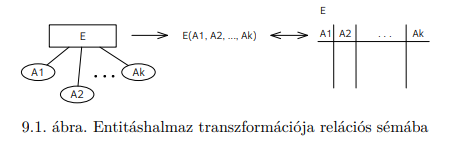

kapcsolattípusok leképezése: olyan ralációs sémára, ami tartalmazza a kapcsolatban részt vevő összes entitáshalmaz kulcsát is az attribútumok között.

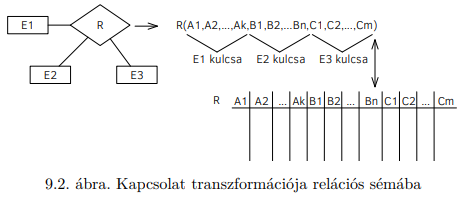

## Tervezés sémadekompozícióval

### Anomáliák

redundancia miatti "kellemetlenségek" - anomáliák

#### Módosítási anomália

redundáns rekord egyik helyen megváltozik, pl adott személy címe, később nem tudjuk melyik a helyes

#### Beszúrási anomália

reláció miatti kapcsolatok miatt pl ismerni kellene egy másik adatot is egy rekord felvételéhez, szállítót nem tudunk felvenni, ha még nem szállított árut. 

#### Törlési anomália

egy attribútum értékét akarjuk törölni, de nem lehetséges,mert pl része egy kulcsnak. pl Cement törléseével kikukázzuk a szállító címét is.

### Adatbázis kényszerek

Az adatbázis tartalmát szabályozzák. 
- értékfüggő: 0 < testmagasság < 300
- értékfüggetlen
    - tartalmazási függőség: idegen kulcsok érték halmaza részhalmaza a megfeleltethető (entitás) kulcshalmazának 
    - Funkcionális függőség
    - Többértékű függőség

### Funkcionális függőségek

#### Determináns

Definíció – determináns (determinant set). Ha X, Y ⊆ R és X → Y , de ∄X′ ⊂
X, hogy X′ → Y, akkor X-et Y determinánsának nevezzük.

- ha nincs X-nek egy szűkebb részhalmaza ami meghatározná Y-t, akkor X Y determinánsa

Definíció – teljes függés (full dependency). Ha X, Y ⊆ R és X → Y , de ∄X′ ⊂ X,
hogy X′ → Y, akkor azt mondjuk, hogy Y teljesen függ (funkcionálisan) X-től.

- ua. mint előbb

Megjegyzés. Vegyük észre, hogy az imént definiált teljes függés és a determináns valójában ugyanannak a két megközelítése: ha X, Y ⊆ R esetén X determinánsa Y -nak, akkor és csak akkor Y teljesen függ X-től.

Definíció – részleges függés (partial dependency). Ha X, Y ⊆ R és X → Y
mellett ∃X′ ⊂ X, hogy X′ → Y, akkor Y részlegesen függ X-től.

- ha van X-nek egy szűkebb részhalmaza (X'), ami meghatározná Y-t, akkor Y részlegesen függ X-től

#### Relációs sémák kulcsai

Definíció – kulcs (relációs sémáé) (key). X-et pontosan akkor nevezzük kulcsnak
az R relációs sémán, ha
- X → R és
- ∄X′ ⊂ X, hogy X′ → R.

Más szavakkal akkor, ha R teljesen függ X-től

Definíció – szuperkulcs (superkey). X-et szuperkulcsnak nevezzük, ha igaz, hogy
X → R. 

Más szavakkal akkor, ha X tartalmaz kulcsot

Ha egy kulcs csak egy attribútumból áll, akkor egyszerű kulcs (simple key), \
ha több attribútumból áll összetett kulcs (composite key)

Tétel. Minden relációs sémának van kulcsa. \
Bizonyítás. Válasszuk ugyanis az attribútumok teljes halmazát. Ez a kulcsokra vonatkozó első feltételnek eleget tesz, hiszen nincs olyan attribútum, amit ne vettünk volna figyelembe. Tehát meghatározza a relációs séma minden attribútumának értékét. Ha a második feltétel is teljesül, akkor kulcs, ha pedig nem, akkor szuperkulcs, tehát tartalmaz kulcsot.

Definíció – elsődleges kulcs (primary key). Ha X és Z az R relációs sémának
egyaránt kulcsai, miközben X ̸= Z, akkor az R relációs sémának több kulcsa is
van. \
Ezek közül kiválasztunk egyet, amelyet elsődleges kulcsnak (primary key) nevezünk. A többi kulcsot kulcsjelöltnek (candidate key) hívjuk.

#### Funkcionális függőségek további tulajdonságai

Definíció – igaz (funkcionális függés) (sound (functional dependency)). Egy
adott R sémán az attribútumain értelmezett FR függéshalmaz mellett egy
X → Y függőség pontosan akkor igaz, ha minden olyan r(R) reláción fennáll,
amelyeken FR összes függősége is fennáll. \
Jelölése: FR ⊨ X → Y .

Definíció – „meg lehet kapni”, azaz levezethető (funkcionális függés) (deducible
(functional dependency)). Egy W → Z funkcionális függőség pontosan akkor
vezethető le adott FR függőségekből, ha az axiómák ismételt alkalmazásával
FR-ből kiindulva megkaphatjuk W → Z-t. \
Jelölése: FR ⊢ W → Z.

#### Armstrong axiómái a funkcionális függőségekről

R séma, X, Y, Z attribútumHALMAZOK, tehát mind egy vagy több attribútumot tartalmaz, melyek elemei R sémának.

a) Ha X ⊆ Y , akkor Y → X (reflexivitás vagy triviális függőség). \
b) Ha X → Y és Y → Z, akkor X → Z (tranzitivitás). \
c) Ha X → Y , akkor XZ → YZ (bővíthetőség).

a: X részhalmaza Y-nak, ezért Y meghatározza X-t \
b: X meghatározza Y-t, ami meghatározza Z-t, ezért X meghatározza Z-t \
c: X meghatározza Y-t, X-t kiegészítve Z-vel megkaphatjuk Y U Z-t, ami YZ

Tétel – igazság tétel (soundness theorem). Az Armstrong axiómák igazak (helyesek), alkalmazásukkal csak igaz függőségek állíthatók elő adott függéshalmazból. \
 Formálisan: FR ⊢ X → Y ⇒ FR ⊨ X → Y

Tétel – teljesség tétel (completeness theorem). Az Armstrong axiómák teljesek,
azaz belőlük minden igaz függőség levezethető. \
Formálisan: FR ⊨ X → Y ⇒ FR ⊢ X → Y (Nem bizonyítjuk.)

#### Az axiómák következményei

d) X → Y és X → Z ⊨ X → YZ (egyesítési szabály). \
e) X → Y és WY → Z ⊨ XW → Z (pszeudotranzitivitás). \
f) X → Y és Z ⊆ Y ⊨ X → Z (dekompozíciós/felbontási szabály).

d: ha X-ből kiindulva megkapom Y-t és Z-is, akkor megkapon Y U Z tehát YZ-t. \
e: ha X-ből megkapom Y-t, amit kiegészítve W-vel (WY) megkapom Z-t, akkor X-t W-vel kiegészítve megkapom Z-t. \
f: ha X-ből megkapom Y-t és Z Y részhalmaza, akkot X-ből Z-t megkapom.

#### Attribútumhalmaz lezártja

Definíció – attribútumhalmaz lezártja (attribute closure). Az X attribútumhalmaz lezárása adott F függéshalmaz mellett az a legbővebb W ⊆ R halmaz,
amelyre az X → W függőség az adott F függéshalmaz mellett fennáll. Jelölése:
X+(F).
Formálisan: X+(F) = {A|A ∈ R és F ⊨ X → A}


 - W adott legbővebb attribútumhalaz ami X-ből elérhető, elemei az $A_i$-k (X->A), $A_i \in$ W és $A_i \in$  R

Tehát ∀Y -ra, amelyre X → Y igaz, hogy Y ⊆ X+, és megfordítva: ∀Y -ra, amelyre
Y ⊆ X+ igaz, hogy X → Y

- X -> Y tehát Y eleme az X+ -nak (X attribútumhalmaz lezrtja tartalmazza Y-t) és fordítva

- példához: adott F = {függőségi halmaz } és X egyenlő valamilyen attribútum halmaz, kérdés X+, vagyis X attribútumhalmazból milyen W (legbővebb elérhető attribútumhalmaz határozható meg F által)

#### Függéshalmaz lezártja

Definíció – függéshalmaz lezártja (closure of functional dependency set). Az F
függéshalmaz lezárása mindazon függőségek halmaza, amelyek az F függéshalmaz elemeiből az Armstrong axiómák alapján következnek.
Formálisan: F+ = {X → Y |F ⊨ X → Y }.

- most az F függéshalmaz adott, kérdés az összes függőség meghatározása/levezetése belőle \
- példához: kérdés adott A -> B függőség levezethető-e egy adott F függéshalmazból,tehát eleme-e F lezártjának

Definíció – függéshalmazok ekvivalenciája (equivalence of functional dependency sets). Két függéshalmaz pontosan akkor ekvivalens, ha lezártjaik megegyeznek.
Ezt így jelöljük: F ≡ G ⇔ F+ = G+ és azt is mondjuk, hogy F lefedi G-t, ill.
G lefedi F-et.

- gyakorlati algoritmus: Függéshalmazok megegyeznek, ha G+ (G függéshalmaz lezártja) tartalmazza F függéshalmazt és F+ (F függéshalmaz lezártja) tartalmazza G függéshalmazt teljesül (F ⊆ G+ és G ⊆ F+ )\
ehhez: F ⊆ G+ részhez vizsgálunk minden F-ben lévő függőséget, 'X->Y'-k, majd megnézzük hogy X -> Y G!!!-ben levezethető-e, vagyis X+(G) tartalmazza-e Y-t , ha igen X->Y függőség benne van G-ben is tehát G ⊆ F+ -nak

Definíció – minimális függéshalmaz (minimal set of functional dependencies).
F minimális függéshalmaz (beszélünk F minimális fedéséről is) akkor, ha
1. a függőségek jobb oldalán csak egyetlen attribútum van,
2. a függőségek bal oldaláról nem hagyható el attribútum,
3. nincs olyan függőség, amely elhagyható.

- kb a megfordítottja a függéshalmaz lezártjának, keressük a legminimálisabb halmazt ami a függéshalmaz lezártjából visszaredukálható. 
- step1: Y-t $A_i$-kre bontjuk, F eredeti és F' felbontott függéshalmaz ua. marad
- step 2: a baloldali X jelölés S-re lett cserélve, majd S attribútumhalmaz felbontása {$D_i$-kre}, végigmegyünk az összes F'-beli S-> B-n, úgy hogy megnézzük ha elhagyjuk vmelyik $D_i$-t az így kapott F'' függéshalmaz lezártja megegyezik-e az képzett F' függéshalmaz lezártjával. ((F')+ = (F")+ ) \
F" = F′ \\ {S → B} ∪ {{D1, D2,...,Di−1, Di+1, ..., Dn} → B} jelentése: az összes F' beli S->B kivéve az ahol baloldalt egyhagytuk az egyik $D_i$-t \
B ∈ S+(F") jelentése B megkapható F''-ben S-ből == B ∈ S+(F' \\ {S->B} U {$D_i$ -k $D_i$ nélkül}) \\
long story short: elhagyható egy attribútum baloldalról és az így keletkezett függéshalmaz megegyezik a "előző/eredeti" függéshalmazzal
- stap 3: megnézzük az összes függőséget F''-ben, jelölése: " T->C "-k, kérdés van-e olyan ami elhagyható, úgy hogy F''' == F'', ahol F''' = F'' \\ {T->C} -tehát T->C függés nélkül is meggegyeznek \
- végül: F* minimális és azonos F-fel

### Relációs sémák normálformái

#### 0NF

Ha legalább egy attribútum nem atomi abban az értelemben, hogy az attribútum értéke nem tekinthető egyetlen egységnek. pl osztály objektum, ami tartalmaz más attribútumokat is. Nulladik normálforma (0NF)-ben van az a relációs séma, amelyik pl. ismétlődő csoportot tartalmaz az attribútumai között.
 

- pl UNI(EGYETEM_NÉV, REKTOR(KAR, DÉKÁN(TANSZÉK, VEZETŐ)∗)∗) , ahol a '*' az ismétlődő csoportokat jelöli

#### 1NF

Definíció – 1NF. Egy relációs séma 1NF alakú (vagy más szóval normalizált,
normalized), ha csak atomi attribútum-értékek szerepelnek benne.

Definíció – elsődleges és másodlagos attribútumok. Egy R relációs séma A ∈ R
attribútuma elsődleges attribútum (primary attribute), ha A eleme a séma valamely K kulcsának. Egyébként A másodlagos attribútum (secondary attribute).

#### 2NF

Definíció – 2NF. Egy 1NF relációs séma 2NF alakú, \
ha benne minden másodlagos attribútum a séma bármely kulcsától teljesen függ. \
Más szavakkal: MÁSODLAGOS attribútum nem függ egyetlen kulcs egyetlen valódi
részhalmazától (részkulcstól) sem

- pl R(A,B,C,D) és F = {AB-> C , B -> D}, mivel A,B,C,D atomi így 1NF. R kulcsa AB. B-> D miatt D függ a kulcs részhalmazától => nem 2NF

- Ha minden kulcs egyszerű, akkor 1NF => 2NF \
- Ha nincsenek másodlagos attribútumok, akkor 1NF => 2NF

Definíció – triviális függés (trivial functional dependency). Ha az X, Y attribútumhalmazokra igaz, hogy Y ⊆ X, akkor az X → Y függőséget triviális
függőségnek nevezzük, egyébként a függőség nemtriviális

- nem triviális függés pl.: ∀Z -> B, de B $\notin$ Z

Definíció – tranzitív függés (transitive dependency). Adott egy R séma, a sémán
értelmezett funkcionális függőségek F halmaza, X ⊆ R, A ∈ R. A tranzitívan
függ X-től, ha ∃Y ⊂ R, hogy X → Y, Y ̸→ X, Y → A és A ∈/ Y 

- ha 2NF =>1NF

#### 3NF

Definíció_1 – 3NF, definíció 1. Egy 1NF R séma 3NF, ha ∀A ∈ R másodlagos
attribútum és ∀X ⊆ R kulcs esetén ∄Y , hogy X → Y , Y ̸→ X, Y → A és
A ∈/ Y .
Szavakkal: ha egyetlen MÁSODLAGOS attribútuma sem függ TRANZITÍVAN egyetlen
kulcstól sem.

- elsődleges attribútum még függhet kulcstól

Definíció_2 – 3NF, definíció 2. Egy 1NF R séma 3NF, ha ∀X → A, X ⊆ R,
A ∈ R nemtriviális függőség esetén \
– X szuperkulcs vagy \
– A elsődleges attribútum.

Tétel: def1 <=> def2 \
def1 => def2
biz: indirekt tfh. adott Z-> B függés és Z nem szuperkulcs (tehát Z /-> X kulcsot)\
X kulcs, X kulcsként meghatározza Z-t, Z meghatározza B-t, tehát feltevés helytelen mert van B ami tranzitíven függ X-től


- ha 3NF => 2NF

#### Boyce-Codd NF (BCNF)

Definíció_1 – BCNF, definíció 1. Egy 1NF R séma BCNF, ha ∀A ∈ R attribútum
és ∀X ⊆ R kulcs esetén ∄Y , hogy X → Y , Y ̸→ X, Y → A és A ∈/ Y .
Szavakkal: egyáltalán nincs tranzitív függőség kulcstól.

- ELSŐDLEGES és MÁSODLAGOS attribútum sem függhet kulcstól

Definíció_2 – BCNF, definíció 2. Egy 1NF R séma BCNF, ha ∀X → A, X ⊆
R, A ∈ R nemtriviális függőség esetén X szuperkulcs.

- A 3NF a másodlagos attribútumok tranzitív (és egyúttal részleges) függését zárja ki, a BCNF pedig az elsődleges attribútumokét is.

- ha BCNF => 3NF

### Veszteségmentes sémafelbontás !#todo

Definíció – sémafelbontás (schema decomposition). Egy R relációs sémának
ρ(R1, R2, . . . , Rn) egy felbontása, ha R1 ∪ R2 ∪ . . . ∪ Rn = R .

# 10. Tranzakciók adatbáziskezelő rendszerekben

Definíció – tranzakció (transaction): Egy program egyszeri futása, amelynek vagy minden művelete hatásos, vagy belőle semmi sem
(ld. atomicitás, oszthatatlanság).

ACID tulajdonságok:
- atomicitás: oszthatatlanság #todo
- konzisztencia: csak sikeresen (teljes egészében) lefutott tranzakcióknak van hatása az adatbázis tartalmára, ekkor a tranzakciók az adatbázist egyik konzisztens állapotból egy másikba viszik át
- izoláció: minden tranzakció úgy fut le (egy konkurens környezetben is), mintha közben más tranzakció nem futna
- tartósság: ha egy tranzakció már sikeresen lefutott, akkor annak hatása „nem veszhet el”

Definíció – ütemezés (schedule). tranzakciók elemi műveleteinek összessége,
melyben a műveletek időbeli sorrendje is egyértelműen meghatározott.

## Ütemezések (schedules)

soros ütemezés: tranzakciók egymás után, átlapolódás nélkül, egyszerre csak egy fut

nem soros ütemezés: minden más... 
- sorosítható
- nem sorosítható

Definíció – sorosíthatóság (serializability). Egy ütemezés pontosan akkor sorosítható, ha létezik olyan soros ütemezés (ez lesz a soros ekvivalens ütemezés,
serial equivalent schedule), amelynek minden hatása a módosított adatokra azonos az adott ütemezésével.

Nem soros ütemezés probléma lehetőségei:

Piszkos olvasás: T2 kiolvassa a T1 által módosított értéket, de T1 még nem fejeződött be

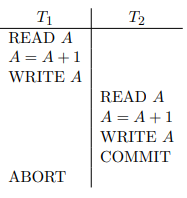

Elveszett módosítás: Több tranzakció ugyanazon az adategységen végez módosítást, T2 által írt művelet elvész

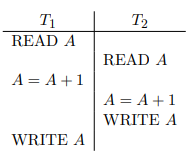

Nem megismételhető olvasás: T1 többször olvassa az adott adategységet, de T2 időközben módosítja így T1 más eredményt kap

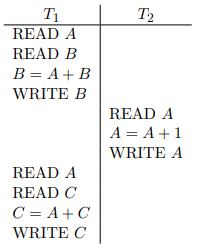

Fantom olvasás: T1 tranzakció többször végrehajt egy lekérdezést, de a T2 a szelekciós feltételnek megfelelő rekordot szúrt be, vagy törölt, -> más a lekérdezés eredményhalmaza

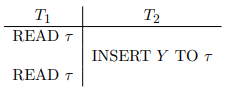

Definíció – izolációs elv (isolation principle). Feltételezzük, hogy egy tranzakció elvárt, korrekt eredménye az, amit akkor kapunk, ha a tranzakció futása közben más tranzakció nem fut.

Definíció – korrekt (correct). Egy ütemezés akkor korrekt, ha sorosítható.

Definíció – ütemező (scheduler). A DBMS azon része, amely az adatelérési
igények megítélése felett dönt (pl. a sorosíthatóság biztosítása és a pattok (ld.
alább) feloldása érdekében). Ennek során
- engedélyezheti az egyes műveleteket, vagy
- ha ennek feltételei nem állnak fenn, akkor
    - várakoztathatja, ill.
    - abortálhatja, újraindíthatja a tranzakciókat

## Tranzakciókezelés zárakkal

Definíció – zár (lock). Hozzáférési privilégium egy adategységen, amely adható és visszavonható.

Definíció – legális ütemezés (legal schedule). Legális az az ütemezés, amelyben
-  a lockolt adategységeket fel is szabadítják (unlockkal), továbbá
- ha egy adategység már foglalt – mert egy másik tranzakció tart fenn zárat
rajta (ami nem megosztható) –, akkor a tranzakció a zár felszabadulásáig várakozik.

nem legális: 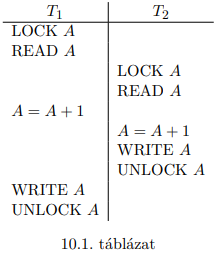 ,
legális: 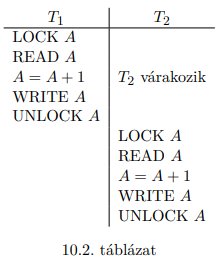

## Problémák zárakkal

t.f.h $T_m$ nem tud továbblépni, mert $T_n \neq T_m$ másik tranzakció egy olyan adategységre tett zárat, ami $T_m$-nek kellene és fordítva, ekkor patt helyzet alakul ki (deadlock)

Megoldás:
- adott tranzakció előre minden neki kellő adategységre lock vagy egyre sem
- ha tranzakció túl sokáig várakozik, akkor abortáljuk
- zárak monitorozása, ha patt helyzet kilőjük a pattot okozó tranzakciót, ehhez pl várakozási gráf

Definíció – várakozási gráf (wait-for graph). Olyan irányított gráf, ahol a gráf csomópontjai a tranzakciók, egy élt pedig akkor rajzolunk a Ti csomópontból a Tj csomópont felé, ha a Ti tranzakció bármely okból várakoztatja a Tj tranzakciót úgy, hogy az nem tud továbbmenni.

Tétel. Adott időpillanatban nincs patt ⇔ a várakozási gráfban nincs kör (azaz a gráf irányított körmentes gráf (DAG))

## Tranzakció modellek

Definíció – egyszerű tranzakció modell (simple transaction model). Egyszerű tranzakció modellről beszélünk, ha
- csak egyfajta zár létezik
- egy adatelemen egyidőben csak egyetlen zár lehet

Definíció – sorosítási gráf, precedenciagráf (precedence graph). Olyan irányított gráf, amelynek a csomópontjai a tranzakciók, egy élt pedig akkor rajzolunk a Ti csomópontból a Tj csomópont felé, ha van olyan A adategység, amelyen egy adott S ütemezésben a Ti tranzakció zárat helyezett el, majd a zár felszabadítása után először a Tj tranzakció helyez el zárat A-n.

- $T_i$ után $T_j$ következik, mert pl $T_j$ $T_i$ által módosíított értéket olvas

Tétel. Egy S ütemezés sorosítható ⇔ a sorosítási gráf DAG. \
Biz: (=>): tfh S sorosítható, de van benne kör, ekkor egyik tranzakció sem előzi meg a másikat, nincs soros ekvivalens, nem sorosítható, tehát ellentmondás \
Biz: (<=): körmentes, ezért van topologikus sorrend és ebből a legelső lefut, majd elhagyható, ekkor újra körmentes lesz a gráf. iterálva az elhagyási sorrent soros ekvivalens lesz-> sorosítható


### Kétfázisú zárolás (2PL)

Definíció – kétfázisú zárolás (two-phase locking, 2PL). Egy tranzakció a kétfázisú zárolás protokollt követia , ha az első zárfelszabadítást megelőzi mindegyik zárkérés. \
Első fázis: zárkérés, második fázis: zárfeloldás

Tétel. Ha egy legális ütemezés minden tranzakciója a 2PL protokollt követi, akkor az ütemezés sorosítható.
Biz: sorosíthatóság szükséges és elégséges feltétele gráfban ne legyen kör -> belátjuk hogy nincs benne kör: \
tfh kör van benne: $T_{i1} \rightarrow T_{i2} \rightarrow T_{ik} \rightarrow T_{i1}$ ($t_{i1}$ elején és végén)\
ekkor: $T_{i1}$ a legelején LOCK és UNLOCK  majd a legvégén újra LOCK-ol, ez sérti a 2PL-t $\rightarrow$ nem lehet kör a gráfban $\rightarrow$ sorosítható

Definíció – zárpont (synchronization point). Az az időpont, amikor egy kétfázisú protokoll szerinti tranzakció az utolsó zárját is megkapja.

- előző tétel bizonyítható zárpontok segítségével is, ekkor a $T_i$ tranzakció 2PL-t követve A-n LOCK-ol, majd UNLOCK-ol, mielőtt $T_j$ tranzakció LOCKolhatná A-t. Ekkor $T_i$ biztos megelőzi $T_j$-t a zárpontok növekvő sorrendjében. $\rightarrow$ sorok ekvivalens a zársorrend $\rightarrow$ sorosítható

Definíció – RLOCK-WLOCK modell (reader - writer lock) (shared and exclusive lock model). Az RLOCK–WLOCK modellben
- kétfajta zár létezik:
    - RLOCK (megosztható, shareable; puha, soft): ha T: RLOCK A érvényes, akkor más tranzakció is olvashatja A-t, de senki nem írhatja.
    - WLOCK (nem megosztható, unshareable; kemény, hard): ha T: WLOCK A érvényes, akkor T-n kívül semmilyen más tranzakció nem fér hozzá A-hoz, sem írásra, sem olvasásra.
- Az UNLOCK művelet kiadása mind az RLOCK-ot, mind a WLOCK-ot felszabadítja, ami legális ütemezések esetén a tranzakció vége előtt bekövetkezik.

R/W LOCK zárkompatibilitási mátrix:

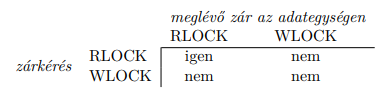

## Zárak hierarchikus adategységeken

ha az adategységek vmelyik hierarchiába vannak szervezve. pl: 
- hierarchikus adatbázis
- B*-fa elemei
- egymásba ágyazott adatelemek (relációs adatbázisban - tábla zárolása a tábla sorai helyett) 

lehetőség a hierarchiában alacsonyabb adatelemek zárolására 

### Fa protokoll

csomópont zárolása NEM jelenti a gyerek zárolását is
1. egy tranzakció az első LOCK -t akárhová teheti
2. további LOCK csak akkor, ha az adategység szülőjére ugyanaz a tranzakció már rakott zárat
3. ugyanaz a tranzakció kétszer ugyanazt az adategységet nem zárolhatja

user manual from a lemma (180.o) \
Legyen E(T) az a csúcs (adategység), amit a T tranzakció elsőnek zárol. \
Ha E(Ti) és E(Tj) közül egyik sem őse a másiknak, akkor nem rajzolunk élt Ti és Tj között, hiszen a protokoll garantálja, hogy ekkor Ti és Tj sohasem fog közös csúcsot (adategységet) zárolni. \
Ezért t. f. h. E(Ti) őse E(Tj)-nek. \
- Ha Ti zárolja először E(Tj)-t, mielőtt Tj zárolná, akkor egy Ti → Tj élt rajzolunk a gráfba (ugyanis a közös, E(Tj) alatti adatokat ekkor Ti fogja
tudni először zárolni).
- Ha Tj zárolja először E(Tj)-t, mielőtt Ti zárolná, akkor pedig egy Tj → Ti élt rajzolunk a gráfba.

### Figyelmeztető protokoll 

csomópont zárolása a gyerek és az összes leszármazott csomópont zárolását is jelenti

két különböző tranzakció nem tarthat fent zárat ugyanazon az adategységen -> zárkonfliktust (átlapolódást) eredményez, ha $T_1$ gyereken és alatt zárol és egy $T_2$ vmelyik őst foglalná le. 

műveletei:
- LOCK A: zárolja A-t és a gyerekeit is
- WARN A: A-ra figyelmeztetést rak (A-t más tranzakció nem zárolhatja)
- UNLOCK A: eltávolítja a zárat vagy a saját WARN-t A-ról

szabályok: 
- tranzakció első művelete LOCK gyökér vagy WARN gyökér
- LOCK A vagy WARN A akkor, ha A szülőjére tett WARN-t
- UNLOCK A, ha A gyerekein nincs LOCK vagy WARN saját tranzakció által
- kétfázisú, UNLOCK után nem lehet LOCK vagy WARN

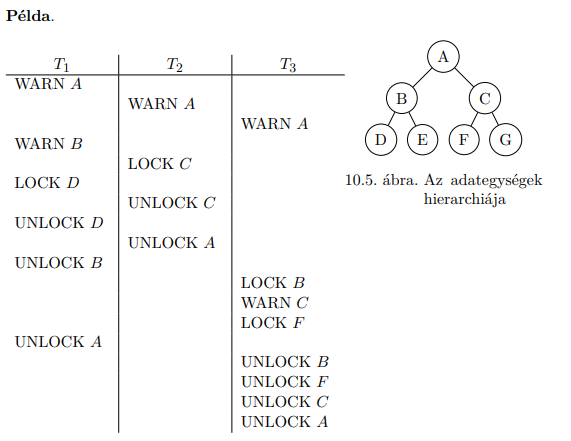

what to see: tranzakció ahhoz hogy labdába rúgjon warnokat helyez el, legelőször a gyökér elemen (warn warnra mehet), majd egészen a lockolni kívánt adategységig. cél: a lockolni kívánt adategység felett senki se lockoljon (átfedés lenne). 

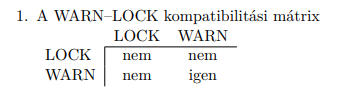

## Tranzakcióhibák kezelése

tranzakció idő előtt befejeződik, okai:
1. tranzakció félbeszakad
2. patt $\rightarrow$ ütemező kilövi
3. ütemező sorosíthatóság biztosítása miatt kilövi
4. rendszerhiba
5. médiahiba (háttértár megsérül)

Definíció – konzisztens állapot (consistent state). Az adatbázisnak olyan állapota, amely csak teljesen lefutott tranzakciók hatását tükrözi (ld. ACID tulajdonságok, 10.1. szakasz).


Definíció – készpont, commit pont (commit point). Az az időpillanat, amikor egy tranzakció futása során már minden befejeződött, ami a tranzakció 1-3. okok miatti abortját eredményezheti.

Definíció – piszkos adat (dirty data). Olyan adat, amit az előtt írt valamely tranzakció az adatbázisba, mielőtt commitált volna (ld. még a 10.2. szakaszban a piszkos olvasás jelenségét).

### Szigorú kétfázisú protokoll

tranzakció ezt követi, ha kétfázisú és
- COMMIT után ír az adatbázisba
- zárakat adatbázisba írás után engedi el

sorrend: COMMIT, adatbázis írás, zárfeloldás $\rightarrow$ sorosítható és lavinamentes (lavina akkor keletkezhet, ha adott tranzakció egy abortáló (commit-t el nem érő) másik tranzakció által módosított adatot használt, ekkor ezen tranzakció által végzett műveleteket is vissza kell állítani)

### Agresszív és konzervatív protokoll

Definíció – agresszív protokoll (aggressive protocol), optimista konkurenciakezelés (optimistic concurrency control). Egy protokoll agresszív, ha megpróbál olyan gyorsan lefutni, amennyire csak lehetséges, nem törődve azzal, hogy ez esetleg aborthoz is vezethet 

Definíció – konzervatív protokoll (conservative protocol), pesszimista konkurenciakezelés (pessimistic concurrency control). Egy protokoll konzervatív, ha megkísérli elkerülni az olyan tranzakciók futtatását, amelyek nem biztos, hogy eredményesek lesznek

## Helyreállítás rendszerhibák és médiahibák után

Definíció – napló (journal, log). A napló a mi értelmezésünk szerint az adatbázison végrehajtott változások története

### redo protokoll

olyan tranzakciókezelést valósít meg, hogy rendszerhiba esetén csak redo kell, szükségtelen az undo művelet. \
részei: 
- redo naplo
- redo helyreállítás 

COMMIT és adatbázis írás közé naplózás, ekkor már visszaállítható a naplónól a múvelet \
helyrellításnál, naplóban visszafelé ($T_i$, COMMIT) bejegyzések megjegyzése egészen a legutolsó stabil állapotig, majd ezen értékek visszaállítása időrendben

## Időbélyeges tranzakciókezelés

adategységekhez időbélyeget rendel \
tranzakciók egyértelmű sorrendjét határozzák meg \
sorbarendezve sorok ekvivalens

Definíció – időbélyeg (timestamp). Olyan érték, amelyet minden tranzakcióhoz szigorú egyediséget biztosítva rendelünk hozzá, és amely arányos (legegyszerűbb esetben azonos) a tranzakció kezdőidejével. Jele: t(Tranzakció).

### Időbélyeges tranzakciókezelés R/W modellben

Definíció – olvasási és írási idő. egy adott t pillanatban
- R(A): az adategység olvasási ideje az A adategységet t-nél előbb olvasó tranzakciók időbélyegei közül a legnagyobb. (legfrissebb)
- W(A): az adategység írási ideje az A adategységet t-nél előbb író tranzakciók időbélyegei közül a legnagyobb. (legfrissebb)

t(T) : tranzakció kezdő ideje 
1. abort T, ha 
    - T olvasni akar és t(T) < W(A) (:  T indulása óta vki írta A-t) vagy 
    - T írni akar és t(T) < R(A) vagy t(T) < W(A),
2. a READ művelet elvégzendő, ha t(T) ≥ W(A) (: T indulása az utolsó írás  után van),
3. WRITE elvégzendő, ha t(T) ≥ R(A) és t(T) ≥ W(A)